## 3. Laboratorijske vježbe iz Numeričke matematike- zad 2

Ime i prezime: **Filip Ćelepirović**

a) Koncentracija otrovne supstance u nekoj kemijskoj reakciji ponaša se kao funkcija vremena $t$ prema formuli
$$n(t)=10te^{-2t}+e^{-t}.$$
Koristeci Newtonovu metodu odredite dvije vrijednosti t za koje je n(t) = 2. Zadatak formulirajte u obliku nelinearne jednadžbe koju treba riješiti. Skicirajte graf  funkcije na intervalu $[0,1]$, tako da u sljedećim zadacima opravdate izbor vaših početnih iteracija.

In [2]:
# Ovdje ide graf funkcije i jedna Markdown linija u kojoj ćete napisati nelinearnu jednadžbu



import sympy as sp

t = sp.symbols('t')
n_t = 10 * t * sp.exp(-2 * t) + sp.exp(-t)
equation = sp.Eq(n_t, 2)


initial_guesses = [0.1, 0.9]  
solutions = []
for guess in initial_guesses:
    solution = sp.nsolve(equation, t, guess)
    solutions.append(solution)


print("Rješenja: ", solutions)




Rješenja:  [0.156610953476658, 0.838381992896903]


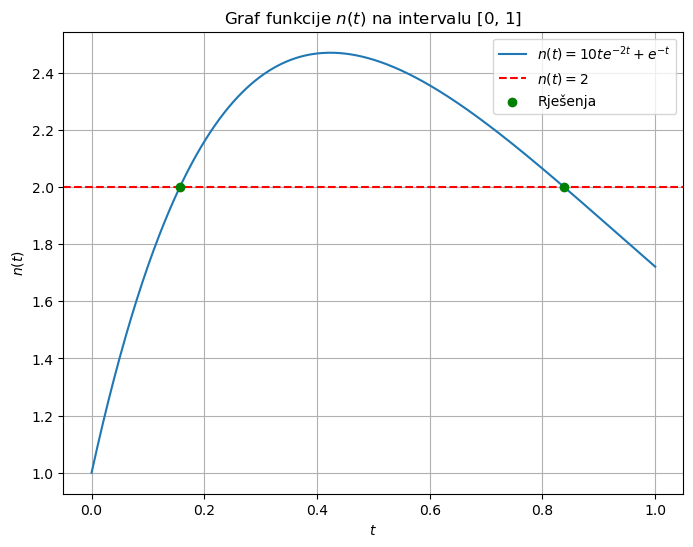

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def n(t):
    return 10 * t * np.exp(-2 * t) + np.exp(-t)



t_values = np.linspace(0, 1, 500)
n_values = n(t_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(t_values, n_values, label=r"$n(t) = 10t e^{-2t} + e^{-t}$")
plt.axhline(2, color='red', linestyle='--', label=r"$n(t) = 2$")
plt.scatter([float(sol) for sol in solutions], [2, 2], color='green', zorder=5, label="Rješenja")
plt.title("Graf funkcije $n(t)$ na intervalu [0, 1]")
plt.xlabel("$t$")
plt.ylabel("$n(t)$")
plt.legend()
plt.grid(True)
plt.show()


b) Napišite kako glasi iterativni postupak za danu funkciju ako koristite Newtonovu metodu.

In [4]:
# Nadopuni. Ovdje treba biti Markdown dio u koji ćete zapisati iterativni postupak,


# Zadana funkcija n(t):
# n(t) = 10t * e^(-2t) + e^(-t)


# 1. Definiramo funkciju f(t) kao:
#    f(t) = n(t) - 2
#    f(t) = 10t * e^(-2t) + e^(-t) - 2
#
# 2. Izvedemo derivaciju funkcije f(t):
#    f'(t) = d/dt [10t * e^(-2t) + e^(-t) - 2]
#    f'(t) = 10e^(-2t) - 20t * e^(-2t) - e^(-t)
#
# 3. Iterativni postupak Newtonove metode:
#    t_(k+1) = t_k - f(t_k) / f'(t_k)
#    t_(k+1) = t_k - (10t_k * e^(-2t_k) + e^(-t_k) - 2) /
#                     (10e^(-2t_k) - 20t_k * e^(-2t_k) - e^(-t_k))
#
# 4. Počevši od početne vrijednosti t_0 i ponavljamo postupak dok razlika između uzastopnih
#    iteracija ne postane dovoljno mala.

c) Implementirajte Newtonovu metodu za dobiveni problem. Kao uvjet zaustavljanja možete postaviti neki od sljedećih uvjeta: $|f(x_n)|\leq \varepsilon_1$, $|x_{n+1}-x_n|\leq \varepsilon_2$ ili određeni maksimalni broj iteracija, ako nije neki od prethodna 2 uvjeta zadovoljen.  Prilikom poziva svoje metode odaberite početne iteracije da dobijete konvergencije prema nultočkama, te ispišite prvih nekoliko vrijednosti niza iteracija.

In [5]:
# Ovdje ide implementacija

import numpy as np


# f(t) i njena derivacija
def f(t):
    return 10 * t * np.exp(-2 * t) + np.exp(-t) - 2

def f_prime(t):
    return 10 * np.exp(-2 * t) - 20 * t * np.exp(-2 * t) - np.exp(-t)


# newtonova metoda
def newton_method_extended(initial_guess, epsilon1=1e-6, epsilon2=1e-6, max_iterations=100):
    t = initial_guess
    iterations = [t] 
    for i in range(max_iterations):
        t_next = t - f(t) / f_prime(t)  
        iterations.append(t_next) 
        
        if abs(f(t_next)) <= epsilon1 or abs(t_next - t) <= epsilon2:
            return t_next, i + 1, iterations  
        
        t = t_next 
    
    


initial_guess = 0.1  

solution, num_iterations, iteration_values = newton_method_extended(initial_guess)

print(f"Rješenje: t = {solution:.6f}, broj iteracija = {num_iterations}")
print("Prvih nekoliko vrijednosti iteracija:")
for i, value in enumerate(iteration_values[:5]):
    print(f"Iteracija {i}: t = {value:.6f}")
    

print('\n')
initial_guess = 0.9  

solution, num_iterations, iteration_values = newton_method_extended(initial_guess)

print(f"Rješenje: t = {solution:.6f}, broj iteracija = {num_iterations}")
print("Prvih nekoliko vrijednosti iteracija:")
for i, value in enumerate(iteration_values[:5]):
    print(f"Iteracija {i}: t = {value:.6f}")


Rješenje: t = 0.156611, broj iteracija = 3
Prvih nekoliko vrijednosti iteracija:
Iteracija 0: t = 0.100000
Iteracija 1: t = 0.148969
Iteracija 2: t = 0.156448
Iteracija 3: t = 0.156611


Rješenje: t = 0.838382, broj iteracija = 2
Prvih nekoliko vrijednosti iteracija:
Iteracija 0: t = 0.900000
Iteracija 1: t = 0.838842
Iteracija 2: t = 0.838382


d) Dobivene nultočke usporedite s onima koje dobijete nekom ugrađenom metodom [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar). Odaberite metodu po izboru od onih koje smo obradili na predavanjima.

In [6]:
#kod

from scipy.optimize import root_scalar



# Newtonovom metodom
initial_guesses = [0.1, 0.9]
newton_solutions = []
for guess in initial_guesses:
    solution, iterations, _ = newton_method_extended(guess)
    newton_solutions.append(solution)

# metodom scipy.optimize.root_scalar
scipy_solutions = []
for guess in initial_guesses:
    result = root_scalar(f, method='newton', fprime=f_prime, x0=guess)
    scipy_solutions.append(result.root)

    
    
    
print("Rješenja Newtonovom metodom:")
for i, solution in enumerate(newton_solutions):
    print(f"Rješenje {i + 1}: t = {solution:.6f}")

print("\nRješenja metodom (scipy.optimize.root_scalar):")
for i, solution in enumerate(scipy_solutions):
    print(f"Rješenje {i + 1}: t = {solution:.6f}")


Rješenja Newtonovom metodom:
Rješenje 1: t = 0.156611
Rješenje 2: t = 0.838382

Rješenja metodom (scipy.optimize.root_scalar):
Rješenje 1: t = 0.156611
Rješenje 2: t = 0.838382


e) Upotrijebite neku od funkcija iz SciPy biblioteke, poput [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve)  ili [link2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1) da pronađete jedno rješenje sustava $\vec{F}(x,y,z)=\vec{0}$
$$\sin x+y^2+\ln z -7=0$$
$$3x+2^y-z^3+1=0$$
$$x+y+z-5=0$$
uzimajući početnu iteraciju $[1,1,1]$. Na kraju, za provjeru ispišite krajnju vrijednost u dobivenom rješenju $(x^*,y^*, z^*)$, odnosno $\vec{F}(x^*,y^*,z^*)$

In [9]:
# kod

from scipy.optimize import fsolve


def system(variables):
    x, y, z = variables
    if z <= 0:
        return [np.inf, np.inf, np.inf]
    return [
        np.sin(x) + y**2 + np.log(z) - 7,  
        3 * x + 2 ** y - z**3 + 1,         
        x + y + z - 5                    
    ]


initial_guess = [1, 1, 1]

solution_fsolve = fsolve(system, initial_guess)

fsolve_check = system(solution_fsolve)


print("Rješenje dobiveno metodom fsolve:")
print(f"x = {solution_fsolve[0]:.6f}, y = {solution_fsolve[1]:.6f}, z = {solution_fsolve[2]:.6f}")
print("Provjera fsolve:")
print(f"F(x, y, z) = {fsolve_check}")


Rješenje dobiveno metodom fsolve:
x = 0.599054, y = 2.395931, z = 2.005015
Provjera fsolve:
F(x, y, z) = [5.752163190209103e-10, 3.5239553497490306e-09, 0.0]
